In [54]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://api.covid19api.com/summary"
response = requests.get(url)
data = json.loads(response.text)

In [69]:
class RidbData():
    def __init__(self, endpoint):
        self.df = pd.DataFrame()
        self.endpoint = endpoint
        
    def extract(self):
        request_url = self.endpoint
        
        try:
            response = requests.get(
                url=self.endpoint
            )
        except requests.exceptions.RequestException:
            print("request fail")
        else:
            data = json.loads(response.text)
            self.df = pd.json_normalize(data.get("Countries"))
    
    def display(self):
        self.df

In [51]:
covid_19_data = RidbData(url)
covid_19_data.extract()


You have reached maximum request limit.


In [3]:
covid_data = pd.json_normalize(data.get("Countries"))
covid_data

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,afghanistan,782,9998,11,216,44,1040,2020-05-24T11:12:56Z
1,Albania,AL,albania,8,989,0,31,6,783,2020-05-24T11:12:56Z
2,Algeria,DZ,algeria,195,8113,10,592,170,4426,2020-05-24T11:12:56Z
3,Andorra,AD,andorra,0,762,0,51,1,653,2020-05-24T11:12:56Z
4,Angola,AO,angola,1,61,1,4,1,18,2020-05-24T11:12:56Z
...,...,...,...,...,...,...,...,...,...,...
181,Viet Nam,VN,vietnam,1,325,0,0,0,267,2020-05-24T11:12:56Z
182,Western Sahara,EH,western-sahara,0,6,0,0,0,6,2020-05-24T11:12:56Z
183,Yemen,YE,yemen,3,212,6,39,0,11,2020-05-24T11:12:56Z
184,Zambia,ZM,zambia,0,920,0,7,0,336,2020-05-24T11:12:56Z


In [22]:
covid_data[covid_data.get("Country").str.startswith("U")]

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
173,Uganda,UG,uganda,23,198,0,0,0,68,2020-05-24T11:12:56Z
174,Ukraine,UA,ukraine,432,20580,17,605,344,6929,2020-05-24T11:12:56Z
175,United Arab Emirates,AE,united-arab-emirates,812,28704,3,244,697,14495,2020-05-24T11:12:56Z
176,United Kingdom,GB,united-kingdom,2960,258504,282,36757,7,1149,2020-05-24T11:12:56Z
177,United States of America,US,united-states,21675,1622612,1108,97087,11104,361239,2020-05-24T11:12:56Z
178,Uruguay,UY,uruguay,11,764,2,22,13,616,2020-05-24T11:12:56Z
179,Uzbekistan,UZ,uzbekistan,87,3115,0,13,40,2532,2020-05-24T11:12:56Z


No handles with labels found to put in legend.


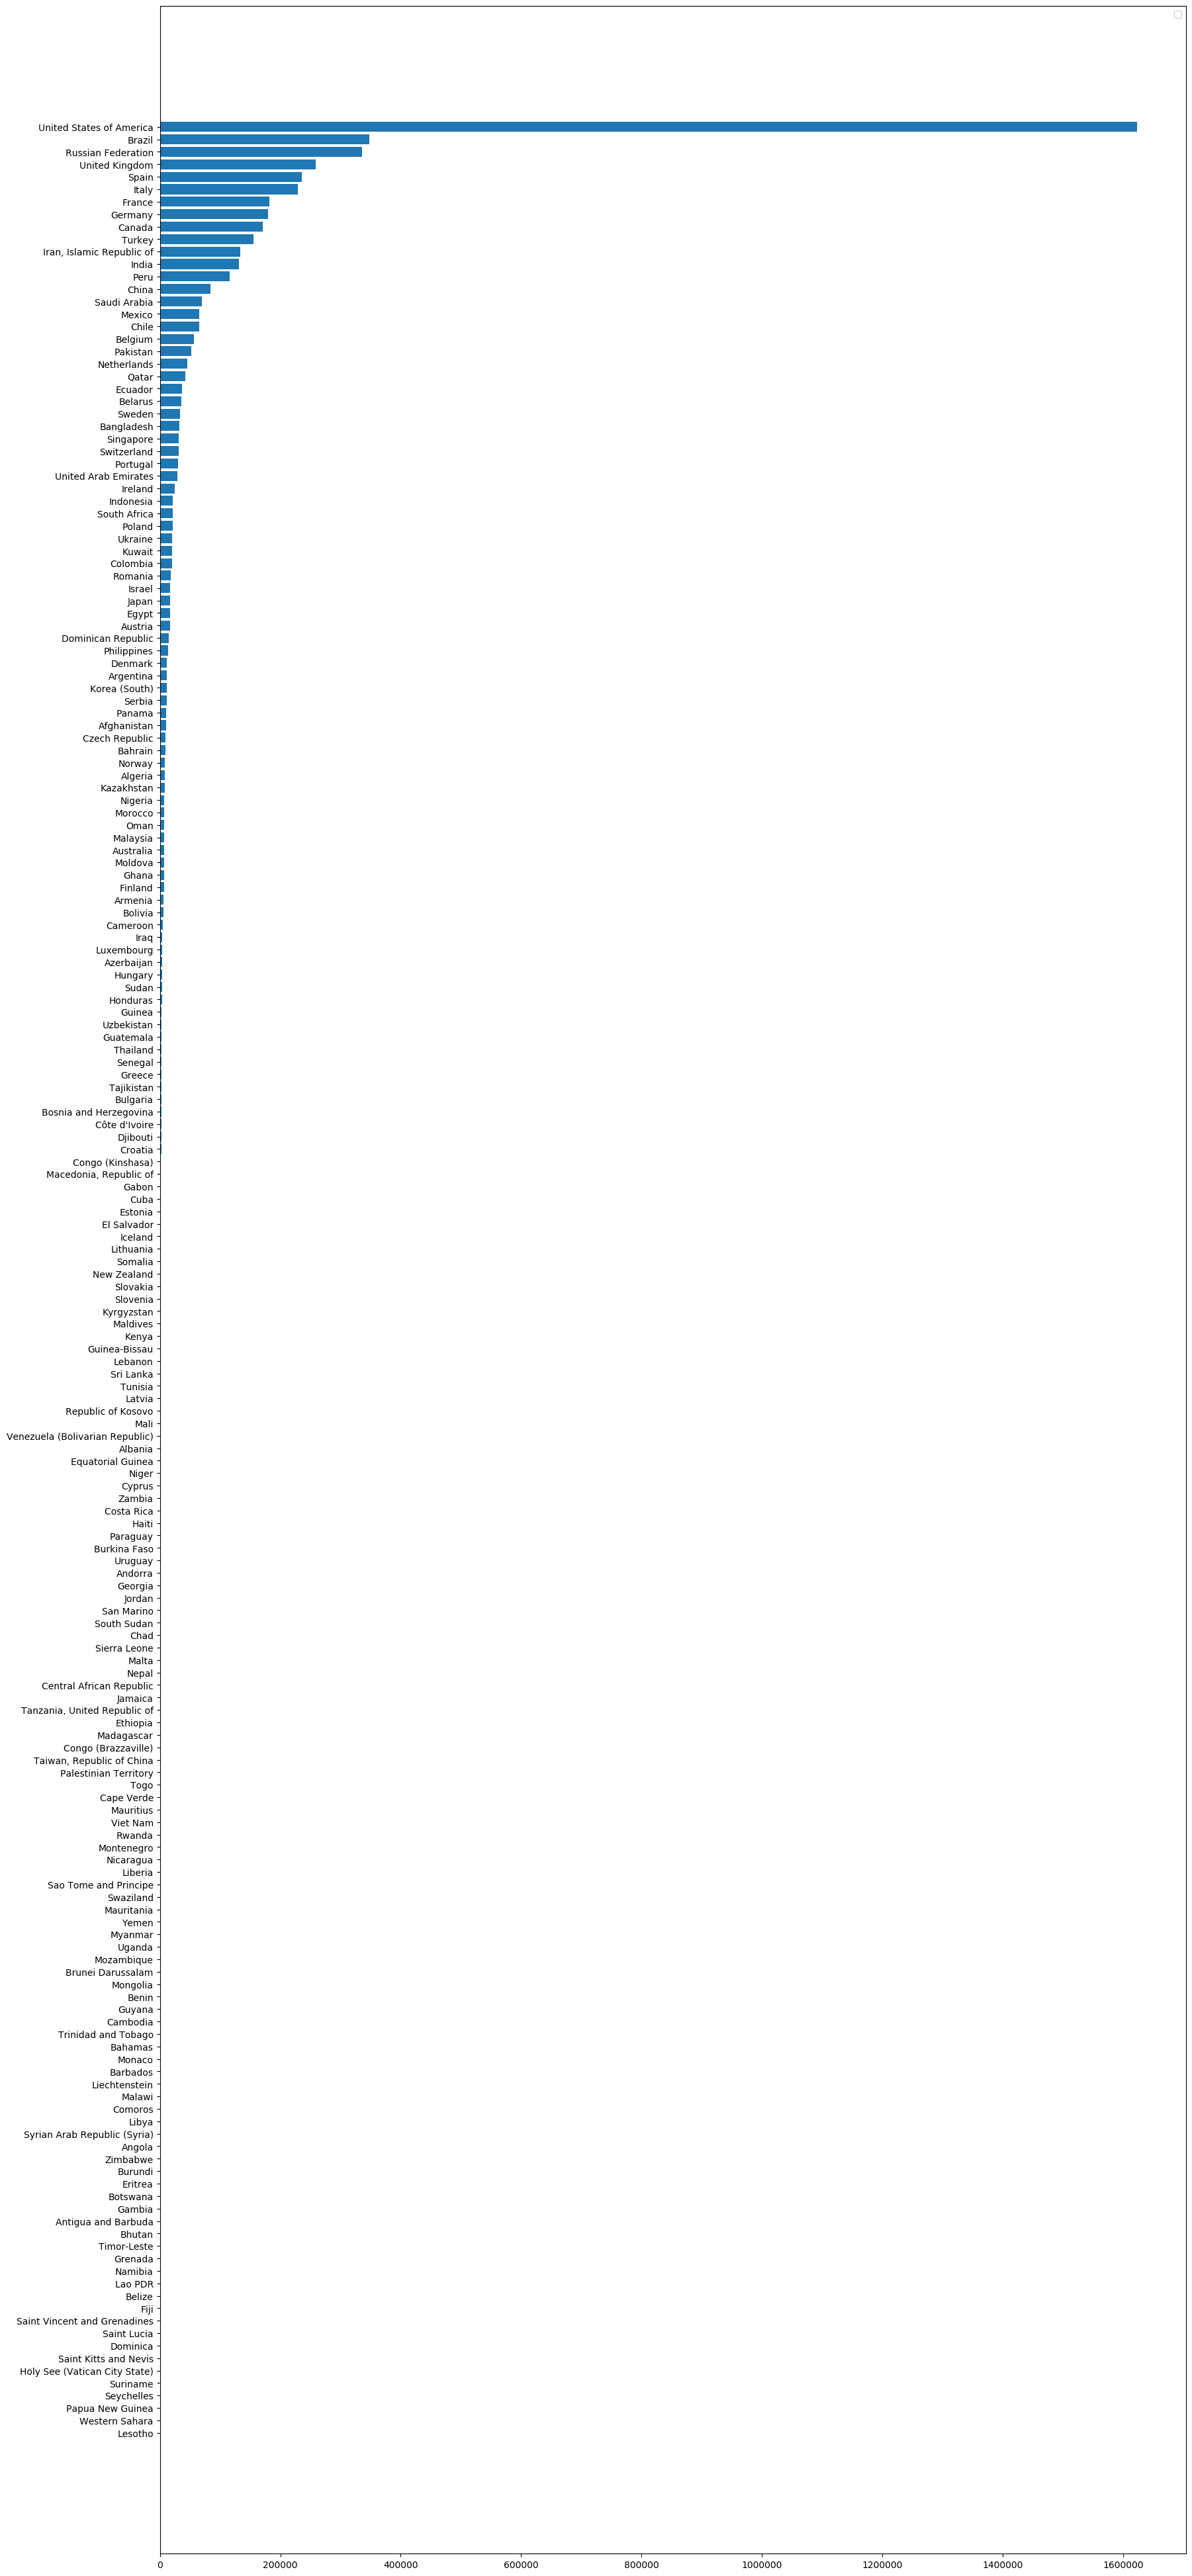

In [74]:
covid_data_sorted = covid_data.sort_values(by="TotalConfirmed")
fig, ax = plt.subplots(figsize=(20, 50))
ax.barh(covid_data_sorted["Country"], covid_data_sorted["TotalConfirmed"])
ax.legend()

In [71]:
covid_data.sort_values(by="TotalConfirmed", ascending=False)

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
177,United States of America,US,united-states,21675,1622612,1108,97087,11104,361239,2020-05-24T11:12:56Z
23,Brazil,BR,brazil,16508,347398,965,22013,7157,142587,2020-05-24T11:12:56Z
138,Russian Federation,RU,russia,9434,335882,139,3388,8111,107936,2020-05-24T11:12:56Z
176,United Kingdom,GB,united-kingdom,2960,258504,282,36757,7,1149,2020-05-24T11:12:56Z
156,Spain,ES,spain,466,235290,50,28678,0,150376,2020-05-24T11:12:56Z
...,...,...,...,...,...,...,...,...,...,...
159,Suriname,SR,suriname,0,11,0,1,0,9,2020-05-24T11:12:56Z
148,Seychelles,SC,seychelles,0,11,0,0,0,11,2020-05-24T11:12:56Z
129,Papua New Guinea,PG,papua-new-guinea,0,8,0,0,0,8,2020-05-24T11:12:56Z
182,Western Sahara,EH,western-sahara,0,6,0,0,0,6,2020-05-24T11:12:56Z
